# P9 Produire une étude de marché avec Python
## Partie 2 : Les analyses

### importation des packages et chargement des données

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns


from matplotlib.gridspec import GridSpec

from pylab import rcParams

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import skew
from scipy.spatial.distance import cdist

from sklearn import cluster
from sklearn import decomposition
from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D
from functions import *

In [2]:
# dataframe pays et region
df_pays_region = pd.read_excel('df_pays_region.xlsx')

# dataframe pays
df_pays = pd.read_excel('df_pays.xlsx')

In [3]:
# utiliser la zone comme index
df_pays_region = df_pays_region.set_index('Zone')
df_pays = df_pays.set_index('Zone')

### cherchons le nombre optimale de cluster

In [4]:
# construction d'un modèle de clustering

distortion = []
inertie = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    
    kmeanModel = cluster.KMeans(n_clusters=k).fit(df_pays_region)
    kmeanModel.fit(df_pays_region)
    
    distortion.append(sum(np.min(cdist(df_pays_region, kmeanModel.cluster_centers_,'euclidean'),axis=1))/df_pays_region.shape[0])
    
    inertie.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(df_pays_region, kmeanModel.cluster_centers_, 'euclidean'),axis=1))/df_pays_region.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


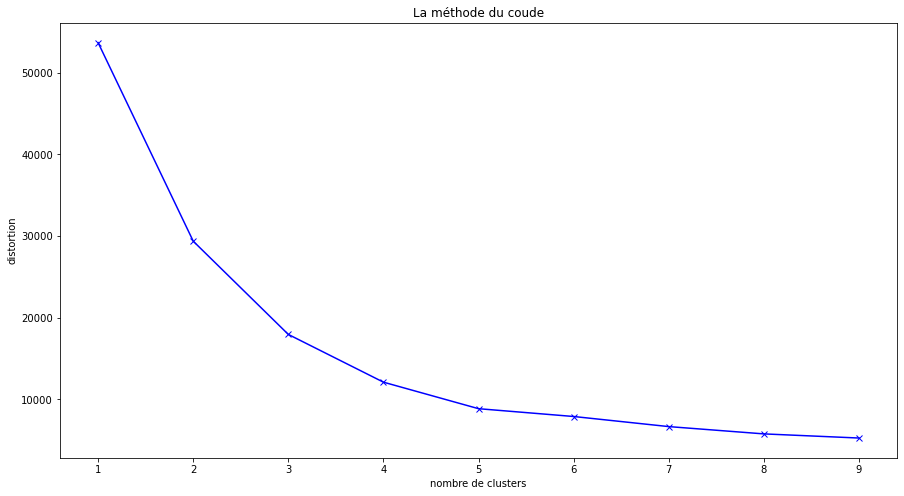

In [5]:
# visualistion du résultat

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(K,distortion,'bx-')   
plt.xlabel('nombre de clusters')
plt.ylabel('distortion')
plt.title('La méthode du coude')

plt.show()

### La classification ascendante hiérarchique

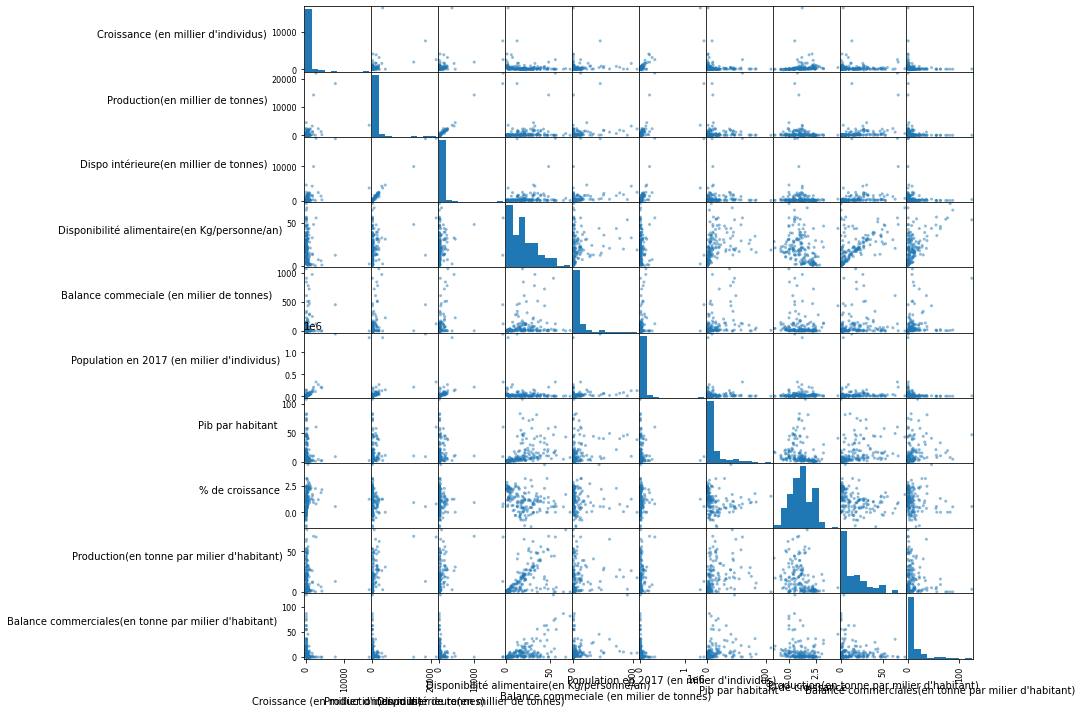

In [6]:
# y a t-il des variables corrélées ?
axes = pd.plotting.scatter_matrix(df_pays,diagonal='hist', figsize=(12,12))

for ax in axes.flatten():
    
    ax.yaxis.label.set_rotation(0)
    
    ax.yaxis.label.set_ha('right')
    
plt.show()

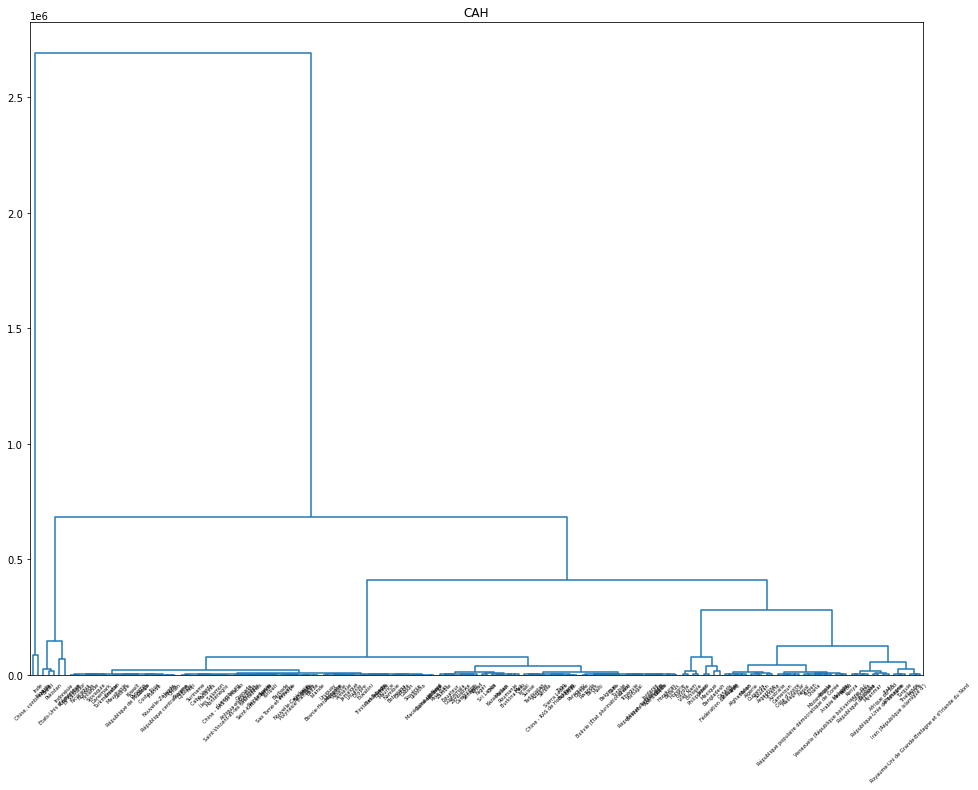

In [7]:
# afficher le Dendrogramme
plt.figure(figsize=(16,12))
plt.title("CAH")
A = linkage(df_pays_region,
                method='ward', metric='euclidean')
dendrogram(A,labels=df_pays_region.index,color_threshold=7)

plt.xticks(rotation=45)

plt.show()

In [8]:
# je vais choisir 7 clusters

groupes_cah = fcluster(A,t=120000,criterion='distance')

idg = np.argsort(groupes_cah)
pd.DataFrame(df_pays_region.index[idg],groupes_cah[idg])

,Zone
1,"Chine, continentale"
1,Inde
2,Pakistan
2,Nigéria
2,Brésil
...,...
7,Colombie
7,Iran (République islamique d')
7,République de Corée
7,Allemagne


In [9]:
groupes_cah2 = fcluster(A,t=90000,criterion='distance')

idg = np.argsort(groupes_cah2)
pd.DataFrame(df_pays_region.index[idg],groupes_cah2[idg])

,Zone
1,"Chine, continentale"
1,Inde
2,Pakistan
2,Nigéria
2,Brésil
...,...
7,Colombie
7,Iran (République islamique d')
7,République de Corée
7,Allemagne


In [10]:
# création d'un autre dataframe avec le numéro des clusteurs
df_pays_region2 = df_pays_region.merge(pd.DataFrame(df_pays_region.index[idg],groupes_cah2[
    idg]),how='outer',left_index=True,right_on='Zone')

In [11]:
# standardisation du nouveau dataframe

df_pays_region2["Croissance (en millier d'individus)"] = (df_pays_region2["Croissance (en millier d'individus)"]-df_pays_region2["Croissance (en millier d'individus)"].mean())/df_pays_region2["Croissance (en millier d'individus)"].std()
df_pays_region2['Production(en millier de tonnes)'] = (df_pays_region2['Production(en millier de tonnes)']-df_pays_region2['Production(en millier de tonnes)'].mean())/df_pays_region2['Production(en millier de tonnes)'].std()
df_pays_region2['Dispo intérieure(en millier de tonnes)'] = (df_pays_region2['Dispo intérieure(en millier de tonnes)']-df_pays_region2['Dispo intérieure(en millier de tonnes)'].mean())/df_pays_region2['Dispo intérieure(en millier de tonnes)'].std()
df_pays_region2['Disponibilité alimentaire(en Kg/personne/an)'] = (df_pays_region2['Disponibilité alimentaire(en Kg/personne/an)']-df_pays_region2['Disponibilité alimentaire(en Kg/personne/an)'].mean())/df_pays_region2['Disponibilité alimentaire(en Kg/personne/an)'].std()
df_pays_region2['Balance commeciale (en milier de tonnes)'] = (df_pays_region2['Balance commeciale (en milier de tonnes)']-df_pays_region2['Balance commeciale (en milier de tonnes)'].mean())/df_pays_region2['Balance commeciale (en milier de tonnes)'].std()
df_pays_region2["Population en 2017 (en milier d'individus)"] = (df_pays_region2["Population en 2017 (en milier d'individus)"]-df_pays_region2["Population en 2017 (en milier d'individus)"].mean())/df_pays_region2["Population en 2017 (en milier d'individus)"].std()
df_pays_region2['Pib par habitant'] = (df_pays_region2['Pib par habitant']-df_pays_region2['Pib par habitant'].mean())/df_pays_region2['Pib par habitant'].std()
df_pays_region2['% de croissance'] = (df_pays_region2['% de croissance']-df_pays_region2['% de croissance'].mean())/df_pays_region2['% de croissance'].std()
df_pays_region2["Production(en tonne par milier d'habitant)"] = (df_pays_region2["Production(en tonne par milier d'habitant)"]-df_pays_region2["Production(en tonne par milier d'habitant)"].mean())/df_pays_region2["Production(en tonne par milier d'habitant)"].std()
df_pays_region2["Balance commerciales(en tonne par milier d'habitant)"] = (df_pays_region2["Balance commerciales(en tonne par milier d'habitant)"]-df_pays_region2["Balance commerciales(en tonne par milier d'habitant)"].mean())/df_pays_region2["Balance commerciales(en tonne par milier d'habitant)"].std()


### K means

In [12]:
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(df_pays_region)

idk = np.argsort(kmeans.labels_)

pd.DataFrame(df_pays_region.index[idk],kmeans.labels_[idk])

,Zone
0,Kirghizistan
0,Koweït
0,Kiribati
0,Saint-Kitts-et-Nevis
0,Saint-Vincent-et-les Grenadines
...,...
6,Guatemala
6,Ghana
6,Pérou
6,Équateur


In [13]:
# comparer la classification ascendante hiérarchique et les k-mean
pd.crosstab(groupes_cah2,kmeans.labels_)

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
1,0,2,0,0,0,0,0
2,0,0,3,0,0,0,0
3,0,0,0,0,0,2,0
4,100,0,0,0,0,0,16
5,0,0,2,6,0,0,0
6,0,0,0,0,10,0,14
7,0,0,0,3,11,0,0


### choix des clusters

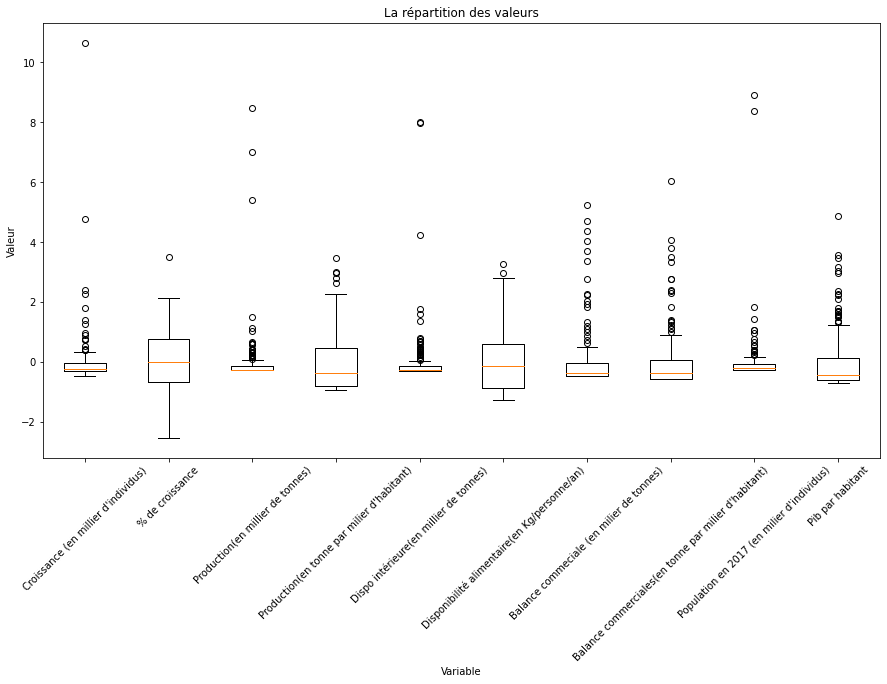

In [14]:
dict_countries = {
    "Croissance (en millier d'individus)": df_pays_region2["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2['Pib par habitant'],
    }
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries.values())
ax.set_xticklabels(dict_countries.keys())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

In [15]:
# création des disctionaires de cluster
dict_countries_cluster_1 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==1]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==1]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==1]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==1]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==1]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==1]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==1]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==1]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==1]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==1]['Pib par habitant'],
    }

dict_countries_cluster_2 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==2]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==2]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==2]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==2]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==2]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==2]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==2]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==2]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==2]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==2]['Pib par habitant'],
    }

dict_countries_cluster_3 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==3]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==3]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==3]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==3]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==3]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==3]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==3]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==3]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==3]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==3]['Pib par habitant'],
    }

dict_countries_cluster_4 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==4]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==4]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==4]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==4]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==4]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==4]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==4]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==4]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==4]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==4]['Pib par habitant'],
    }

dict_countries_cluster_5 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==5]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==5]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==5]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==5]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==5]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==5]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==5]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==5]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==5]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==5]['Pib par habitant'],
    }

dict_countries_cluster_6 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==6]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==6]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==6]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==6]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==6]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==6]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==6]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==6]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==6]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==6]['Pib par habitant'],
    }

dict_countries_cluster_7 = {
    "Croissance (en millier d'individus)": df_pays_region2[df_pays_region2.index[:]==7]["Croissance (en millier d'individus)"],
    '% de croissance': df_pays_region2[df_pays_region2.index[:]==7]['% de croissance'],
    'Production(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==7]['Production(en millier de tonnes)'],
    "Production(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==7]["Production(en tonne par milier d'habitant)"],
    'Dispo intérieure(en millier de tonnes)': df_pays_region2[df_pays_region2.index[:]==7]['Dispo intérieure(en millier de tonnes)'],
    'Disponibilité alimentaire(en Kg/personne/an)': df_pays_region2[df_pays_region2.index[:]==7]['Disponibilité alimentaire(en Kg/personne/an)'],
    'Balance commeciale (en milier de tonnes)': df_pays_region2[df_pays_region2.index[:]==7]['Balance commeciale (en milier de tonnes)'],
    "Balance commerciales(en tonne par milier d'habitant)": df_pays_region2[df_pays_region2.index[:]==7]["Balance commerciales(en tonne par milier d'habitant)"],
    "Population en 2017 (en milier d'individus)": df_pays_region2[df_pays_region2.index[:]==7]["Population en 2017 (en milier d'individus)"],
    'Pib par habitant': df_pays_region2[df_pays_region2.index[:]==7]['Pib par habitant'],
    }

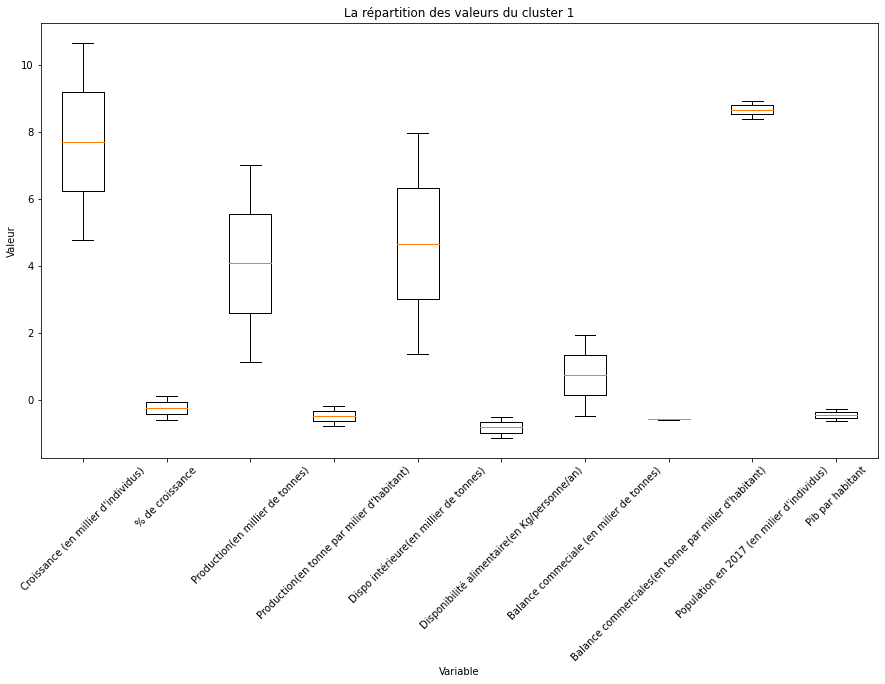

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_1.values())
ax.set_xticklabels(dict_countries_cluster_1.keys())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs du cluster 1")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

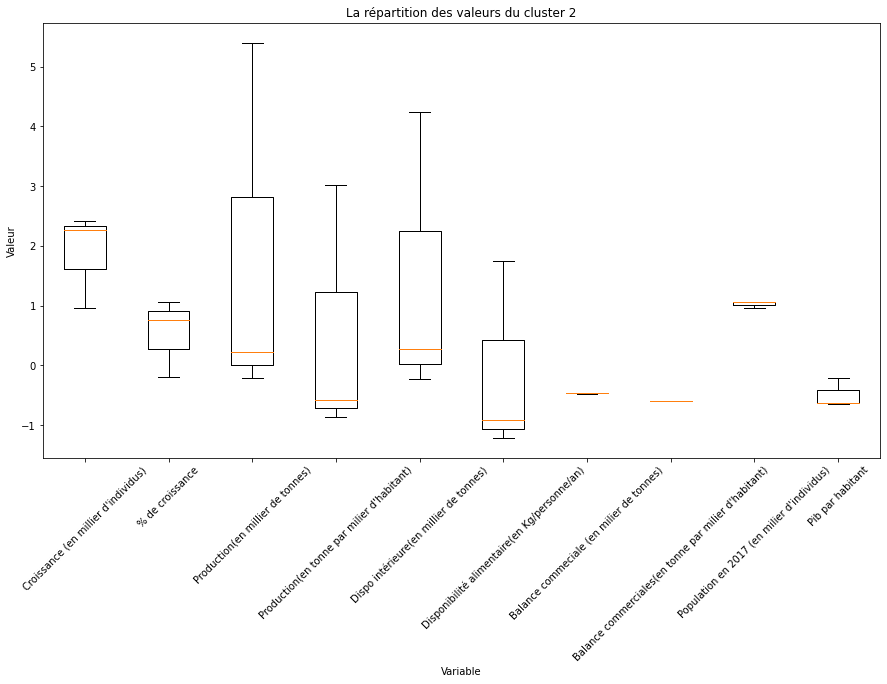

In [17]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_2.values())

ax.set_xticklabels(dict_countries_cluster_2.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs du cluster 2")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

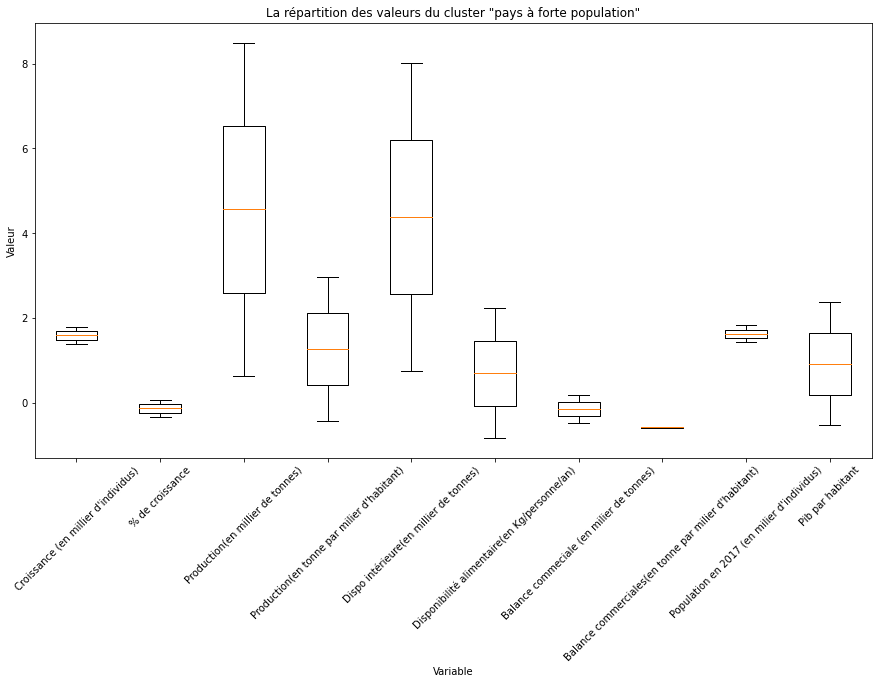

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_3.values())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

ax.set_xticklabels(dict_countries_cluster_2.keys())

plt.xticks(rotation=45)
ax.set_title('La répartition des valeurs du cluster "pays à forte population"')
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

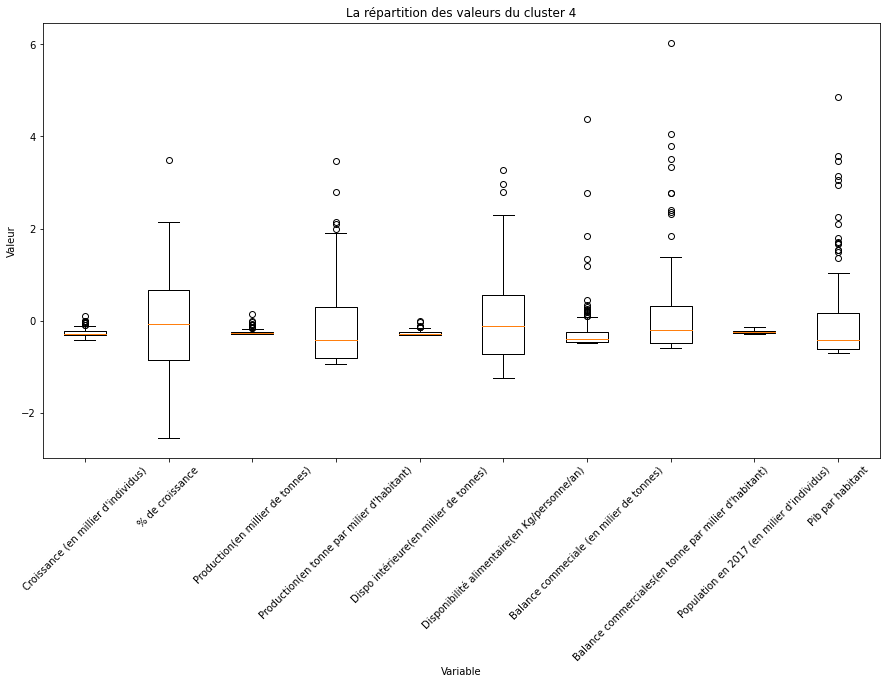

In [19]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_4.values())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

ax.set_xticklabels(dict_countries_cluster_2.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs du cluster 4")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

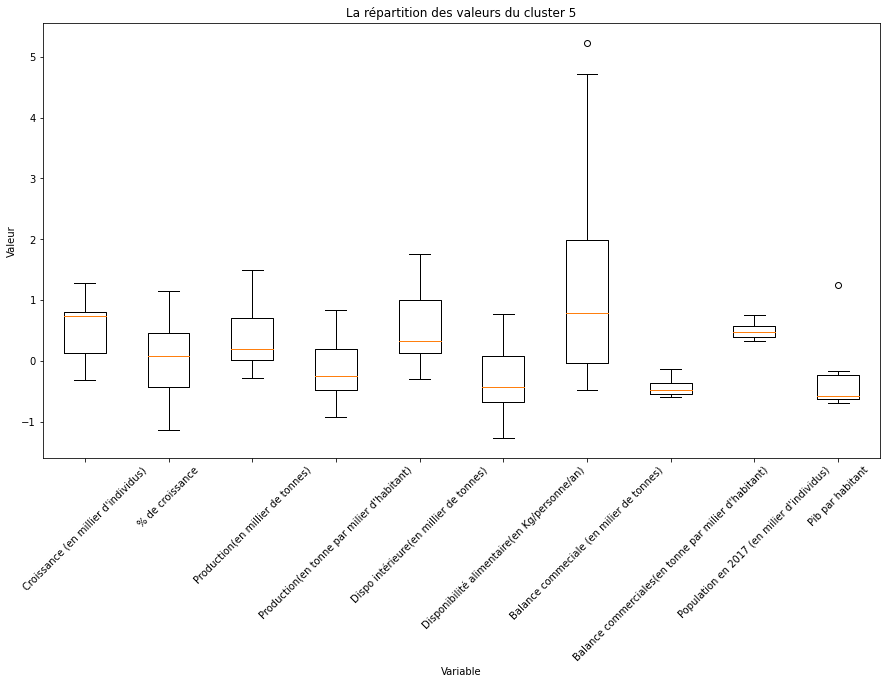

In [20]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_5.values())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

ax.set_xticklabels(dict_countries_cluster_2.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs du cluster 5")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

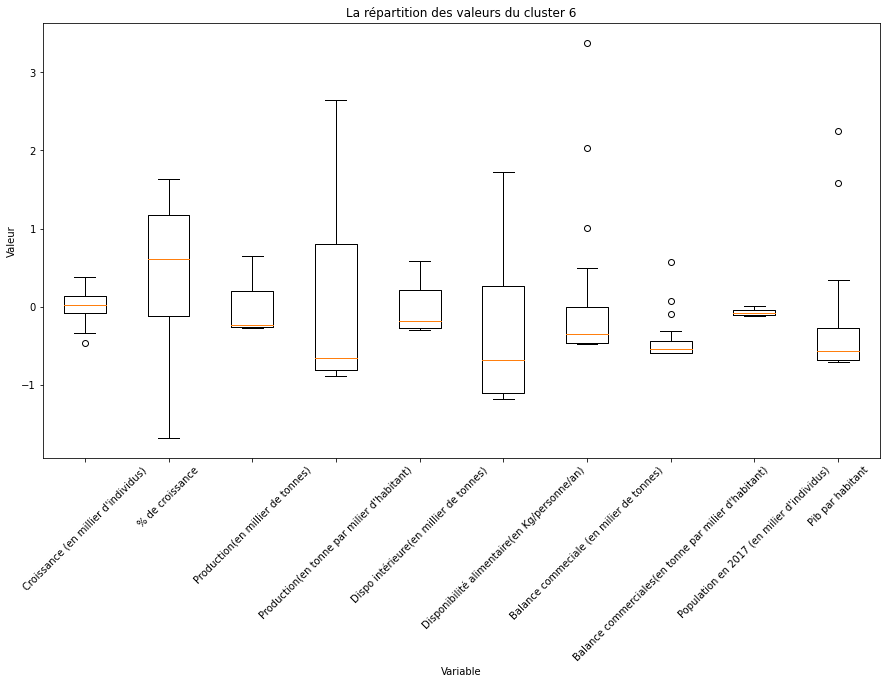

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_6.values())
# ax.set_xticklabels(dict_repartition_ca_par_age.keys())

ax.set_xticklabels(dict_countries_cluster_2.keys())

plt.xticks(rotation=45)
ax.set_title("La répartition des valeurs du cluster 6")
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

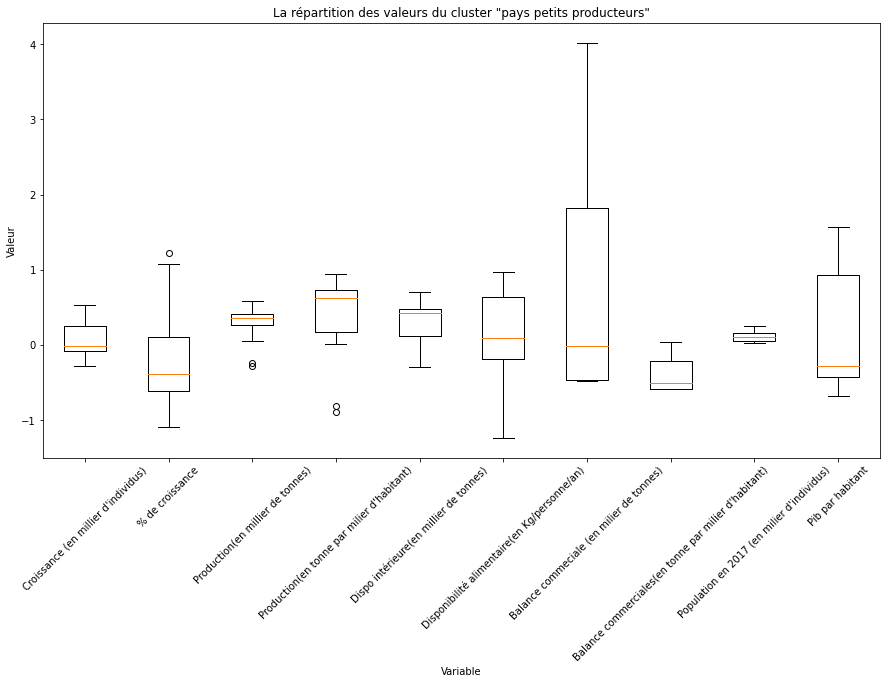

In [22]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(dict_countries_cluster_7.values())
ax.set_xticklabels(dict_countries_cluster_7.keys())

plt.xticks(rotation=45)
ax.set_title('La répartition des valeurs du cluster "pays petits producteurs"')
ax.set_xlabel("Variable")
ax.set_ylabel("Valeur")

plt.show()

In [23]:
# quelles variables caractérisent les groupes ?
# quand la variabilité est faible, le cluster regroupe les individus par rapport à cette metrix 
# par exemple les individus du groupe 3 ont des valeurs similaire pour l'accroissement, le % d'accroissement, la disponibilité 
# alimentaire, la balance commerciale et la balance commerciale par habitant

In [24]:
df_pays_region2.index.name = "groupe"

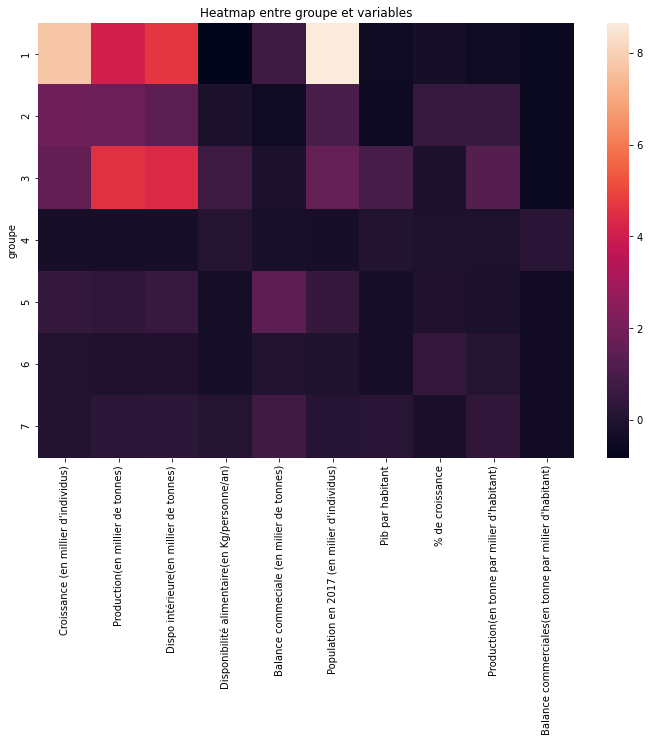

In [25]:
# Heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_pays_region2.groupby('groupe').mean()[
    ["Croissance (en millier d'individus)",'Production(en millier de tonnes)','Dispo intérieure(en millier de tonnes)','Disponibilité alimentaire(en Kg/personne/an)','Balance commeciale (en milier de tonnes)',"Population en 2017 (en milier d'individus)","Pib par habitant","% de croissance","Production(en tonne par milier d'habitant)","Balance commerciales(en tonne par milier d'habitant)"]])
plt.title('Heatmap entre groupe et variables')
# générer l'image de la Heatmap
plt.savefig("output.png")

In [26]:
# je décide de garder uniquement les clusters 3 et 7
# on effectue un filtre pour avoir seulement les clusters 3 et 7
df_pays_region = df_pays_region.merge(pd.concat([pd.DataFrame(df_pays_region.index[idg],groupes_cah[idg]).loc[7],pd.DataFrame(df_pays_region.index[idg],groupes_cah[idg]).loc[3]]),how='right',left_on='Zone',right_on='Zone')

In [27]:
df_pays = df_pays_region[["Zone","Croissance (en millier d'individus)","Production(en millier de tonnes)","Dispo intérieure(en millier de tonnes)","Disponibilité alimentaire(en Kg/personne/an)","Balance commeciale (en milier de tonnes)","Population en 2017 (en milier d'individus)","Pib par habitant","% de croissance","Production(en tonne par milier d'habitant)","Balance commerciales(en tonne par milier d'habitant)"]]
df_pays = df_pays.set_index('Zone')

In [28]:
df_pays_region = df_pays_region.set_index('Zone')
df_pays_region = df_pays_region.drop('Oceanie',1)

## L'analyse en composante principale PCA

In [29]:
# standardiser le dataframe
df_stand_pays = (df_pays - df_pays.mean(axis=0)) / df_pays.std(axis=0)

In [30]:
# choix du nombre de composantes
n_comp = 3

X = df_stand_pays.values
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)

pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)

PCA(n_components=3)

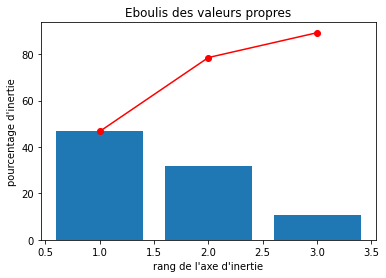

In [31]:
# éboulis des valeurs propres
display_scree_plot(pca)

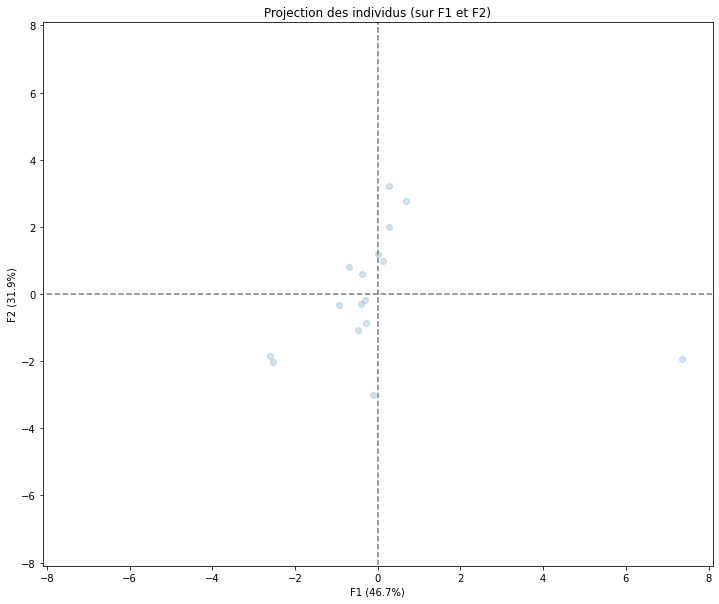

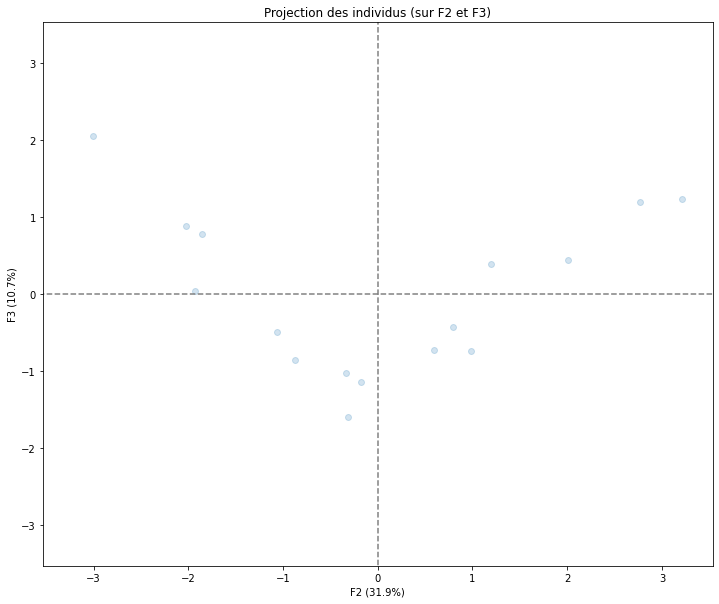

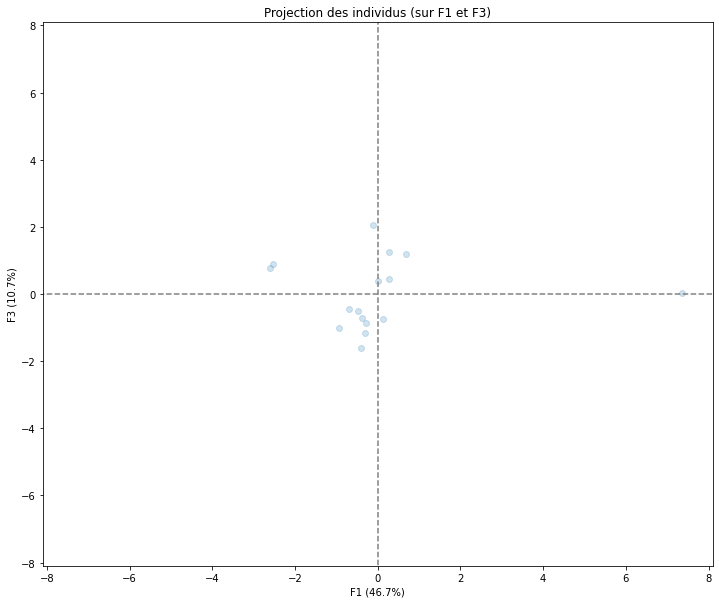

In [32]:
# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected,n_comp,pca,[(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()

### afficher un cercle de corrélation

In [33]:
# ajouter les composantes principales au dataframe
df_stand_pays['PC 1']=X_projected[:,0]
df_stand_pays['PC 2'  ]=X_projected[:,1]

<Figure size 1296x1512 with 0 Axes>

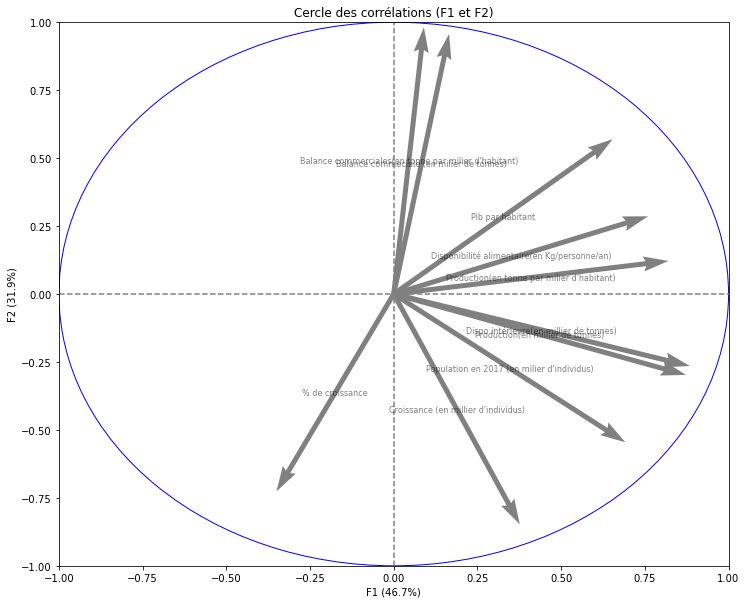

In [34]:
# afficher le cercle de corrélation
features = df_stand_pays.columns

pcs = pca.components_

plt.figure(figsize=(18,21))

display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

### Choix des pays

<AxesSubplot:ylabel='Zone'>

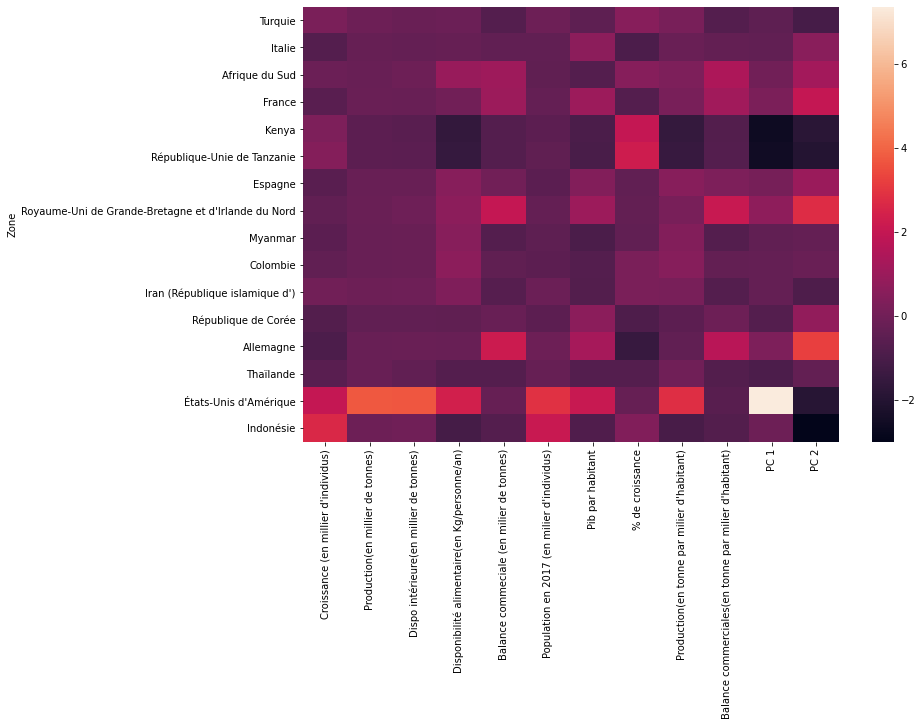

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_stand_pays)

In [36]:
df_stand_pays

,Croissance (en millier d'individus),Production(en millier de tonnes),Dispo intérieure(en millier de tonnes),Disponibilité alimentaire(en Kg/personne/an),Balance commeciale (en milier de tonnes),Population en 2017 (en milier d'individus),Pib par habitant,% de croissance,Production(en tonne par milier d'habitant),Balance commerciales(en tonne par milier d'habitant),PC 1,PC 2
Zone,,,,,,,,,,,,
Turquie,0.222476,-0.108760,-0.193911,-0.155916,-0.704289,-0.123001,-0.489836,0.547187,0.164130,-0.734547,-0.473100,-1.066539
Italie,-0.714935,-0.279010,-0.311489,-0.282738,-0.378366,-0.374918,0.642665,-0.924405,-0.186523,-0.359757,-0.383146,0.597152
Afrique du Sud,-0.156428,-0.210677,-0.089709,0.928559,1.067486,-0.420069,-0.722529,0.499167,0.309498,1.420268,0.001929,1.196108
France,-0.592110,-0.194564,-0.217614,0.006936,1.039748,-0.323546,1.043125,-0.697756,0.161874,1.129294,0.264673,2.009405
Kenya,0.276936,-0.527493,-0.578564,-1.594917,-0.714691,-0.503725,-0.959484,1.995279,-1.561481,-0.743423,-2.610160,-1.851839
République-Unie de Tanzanie,0.476237,-0.513904,-0.561432,-1.507726,-0.707757,-0.449021,-0.989233,2.221388,-1.481248,-0.734642,-2.522556,-2.021047
Espagne,-0.595586,-0.240184,-0.235451,0.546651,-0.003901,-0.547764,0.424117,-0.372769,0.521680,0.311225,0.128754,0.985331
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,-0.407872,-0.182140,-0.062486,0.658341,1.986313,-0.300317,1.036797,-0.332316,0.174770,2.058229,0.688153,2.770648
Myanmar,-0.546920,-0.211647,-0.195788,0.545210,-0.704289,-0.464767,-0.974971,-0.393608,0.433591,-0.729936,-0.398672,-0.309661
